<a href="https://colab.research.google.com/github/asritha261091/covidPredictionIndia/blob/master/covidPredictionIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

In [0]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/
time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [0]:
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "Unites States")
death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "Unites States")
recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "Unites States")

In [0]:
population=pd.read_csv('https://raw.githubusercontent.com/Rank23/COVID19/master/population.csv', sep=',', encoding='latin1') 

In [0]:
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [0]:
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)

In [0]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [0]:
# confirmed case / 확진된 케이스 dataframe
ts_c=create_ts(confirmed)

# deceased case / 사망한 케이스 dataframe
ts_d=create_ts(death)

# recovered case /  완치된 케이스 dataframe
ts_rec=create_ts(recover)

Text(0.5, 1.0, 'Daily Confirmed - India')

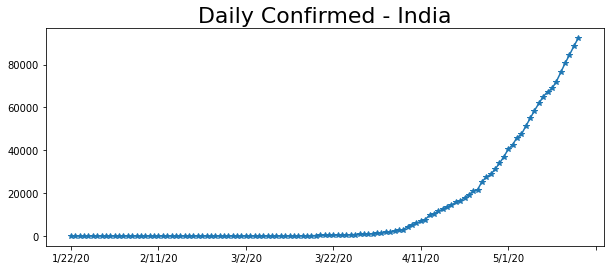

In [0]:
import matplotlib.pyplot as plt
p_c=ts_c.reindex(ts_c.max().sort_values(ascending=False).index, axis=1)
p_c.iloc[:,11].plot(marker='*',figsize=(10,4)).set_title('Daily Confirmed - India',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Daily Recovered - India')

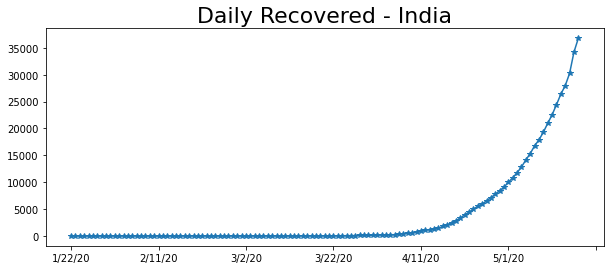

In [0]:
p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,11].plot(marker='*',figsize=(10,4)).set_title('Daily Recovered - India',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Daily Deaths - India')

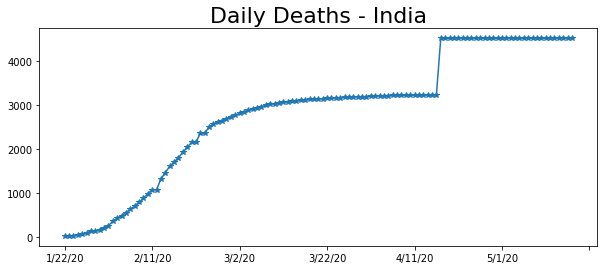

In [0]:
p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,11].plot(marker='*',figsize=(10,4)).set_title('Daily Deaths - India',fontdict={'fontsize': 22})

In [0]:
ts_confirmed=ts_c.reset_index()
ts_confirmed=ts_confirmed.rename(columns = {'index':'date'})
ts_confirmed['date']=pd.to_datetime(ts_confirmed['date'] ,errors ='coerce')

In [0]:
project_path_py =r'/content/drive/My Drive/ts_confirmed.csv' 
ts_confirmed.to_csv(project_path_py)

In [0]:
import rpy2
%load_ext rpy2.ipython

In [0]:
%%R
install.packages('pracma')
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [0]:
%%R
# ENTER YOUR GOOGLE DRIVE PATH TO THE COLABORATORY
# 위에서 정의한 project_path_py와 동일한 폴더로 경로를 지정해주시면 됩니다.
confirmed_path_R = '/content/drive/My Drive/ts_confirmed.csv'

In [0]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv(confirmed_path_R)
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [0]:
p=%R pred_all
p

,Y,X,X2
1,0.0,0.000000,0.0000
2,0.0,0.000000,0.0000
3,0.0,0.000000,0.0000
4,0.0,0.000000,0.0000
5,0.0,0.000000,0.0000
...,...,...,...
31384,37.0,37.079164,0.9952
31385,42.0,37.478177,0.9693
31386,42.0,40.703877,2.4515
31387,44.0,42.606629,2.8763


In [0]:
confirmedPred=ts_c
confirmedPred=confirmedPred.stack().reset_index(name='confirmed')
confirmedPred.columns=['date', 'region','confirmed']
confirmedPred['date']=pd.to_datetime(confirmedPred['date'] ,errors ='coerce')
confirmedPred=confirmedPred.sort_values(['region', 'date'])

# Add 1 Future day for prediction
confirmedPred=confirmedPred.reset_index(drop=True)
for i in range(1,len(confirmedPred)+1):
  if(confirmedPred.iloc[i,1] is not confirmedPred.iloc[i-1,1]):
    confirmedPred.loc[len(confirmedPred)+1] = [confirmedPred.iloc[i-1,0]+ pd.DateOffset(1),confirmedPred.iloc[i-1,1], 0] 
confirmedPred=confirmedPred.sort_values(['region', 'date'])
confirmedPred=confirmedPred.reset_index(drop=True)


In [0]:
confirmedPred['1_day_change']=confirmedPred['3_day_change']=confirmedPred['7_day_change']=confirmedPred['1_day_change_rate']=confirmedPred['3_day_change_rate']=confirmedPred['7_day_change_rate']=confirmedPred['last_day']=0
for i in range(1,len(confirmedPred)):
  if(confirmedPred.iloc[i,1] is confirmedPred.iloc[i-2,1]):
    confirmedPred.iloc[i,3]=confirmedPred.iloc[i-1,2]-confirmedPred.iloc[i-2,2]
    confirmedPred.iloc[i,6]=(confirmedPred.iloc[i-1,2]/confirmedPred.iloc[i-2,2]-1)*100
    confirmedPred.iloc[i,9]=confirmedPred.iloc[i-1,2]
  if(confirmedPred.iloc[i,1] is confirmedPred.iloc[i-4,1]):
    confirmedPred.iloc[i,4]=confirmedPred.iloc[i-1,2]-confirmedPred.iloc[i-4,2]
    confirmedPred.iloc[i,7]=(confirmedPred.iloc[i-1,2]/confirmedPred.iloc[i-4,2]-1)*100
  if(confirmedPred.iloc[i,1] is confirmedPred.iloc[i-8,1]):
    confirmedPred.iloc[i,5]=confirmedPred.iloc[i-1,2]-confirmedPred.iloc[i-8,2]
    confirmedPred.iloc[i,8]=(confirmedPred.iloc[i-1,2]/confirmedPred.iloc[i-8,2]-1)*100
confirmedPred=confirmedPred.fillna(0)
p=p.reset_index(drop=True)
confirmedPred.index=p.index
confirmedPred['X'] = p['X']  
confirmedPred=confirmedPred.rename(columns = {'X':'kalman_prediction'}) 
confirmedPred=confirmedPred.replace([np.inf, -np.inf], 0)
confirmedPred['kalman_prediction']=round(confirmedPred['kalman_prediction'])
confirmedPred

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction
0,2020-01-22,Afghanistan_nan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0
1,2020-01-23,Afghanistan_nan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0
2,2020-01-24,Afghanistan_nan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0
3,2020-01-25,Afghanistan_nan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0
4,2020-01-26,Afghanistan_nan,0,0,0,0,0.000000,0.000000,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31383,2020-05-14,Zimbabwe_nan,37,1,1,3,2.777778,2.777778,8.823529,37,37.0
31384,2020-05-15,Zimbabwe_nan,42,0,1,3,0.000000,2.777778,8.823529,37,37.0
31385,2020-05-16,Zimbabwe_nan,42,5,6,8,13.513514,16.666667,23.529412,42,41.0
31386,2020-05-17,Zimbabwe_nan,44,0,5,7,0.000000,13.513514,20.000000,42,43.0


In [0]:
prediction=confirmedPred[confirmedPred['region']==region][['date','region','confirmed','kalman_prediction']]
prediction.tail(10)

,date,region,confirmed,kalman_prediction
16982,2020-05-09,India_nan,62808,62645.0
16983,2020-05-10,India_nan,67161,66090.0
16984,2020-05-11,India_nan,70768,70120.0
16985,2020-05-12,India_nan,74292,74046.0
16986,2020-05-13,India_nan,78055,77820.0
16987,2020-05-14,India_nan,81997,81624.0
16988,2020-05-15,India_nan,85784,85547.0
16989,2020-05-16,India_nan,90648,89442.0
16990,2020-05-17,India_nan,95698,93969.0
16991,2020-05-18,India_nan,0,98997.0


In [0]:
prediction.iloc[len(prediction)-1,2]=None
prediction=prediction.set_index(['date'])

Text(0.5, 1.0, 'Kalman Prediction for 1 day - India')

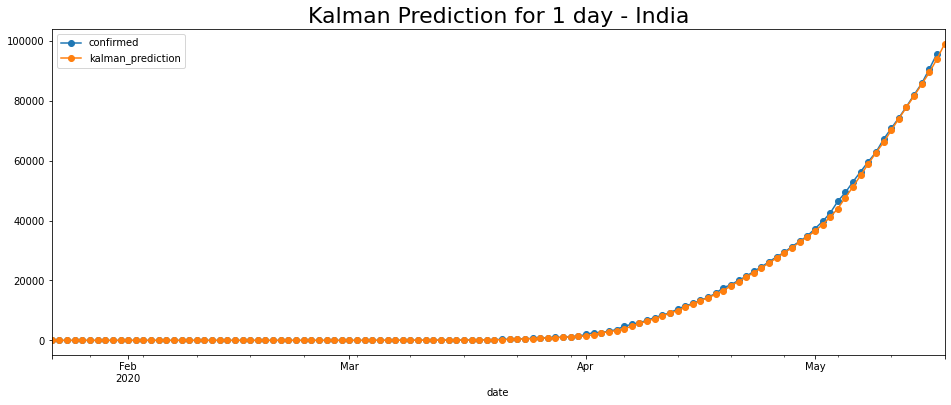

In [0]:
prediction.iloc[:,1:3].plot(marker='o',figsize=(16,6)).set_title('Kalman Prediction for 1 day - India'.format(prediction.iloc[0,0]),fontdict={'fontsize': 22})

,region,confirmed,kalman_prediction,DailyBedCount
date,,,,
2020-05-09,India_nan,62808.0,62645.0,3113.0
2020-05-10,India_nan,67161.0,66090.0,4353.0
2020-05-11,India_nan,70768.0,70120.0,3607.0
2020-05-12,India_nan,74292.0,74046.0,3524.0
2020-05-13,India_nan,78055.0,77820.0,3763.0
2020-05-14,India_nan,81997.0,81624.0,3942.0
2020-05-15,India_nan,85784.0,85547.0,3787.0
2020-05-16,India_nan,90648.0,89442.0,4864.0
2020-05-17,India_nan,95698.0,93969.0,5050.0


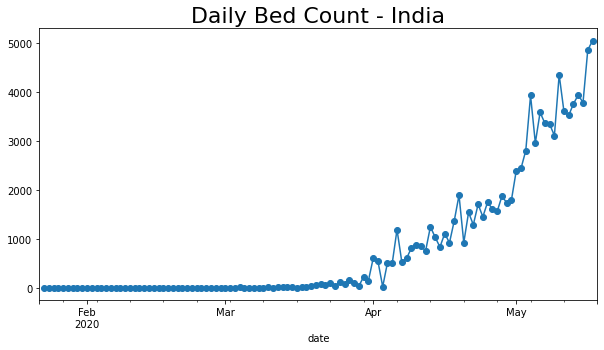

In [0]:
prediction['DailyBedCount'] = prediction['confirmed'] - prediction['confirmed'].shift(1)
prediction.iloc[:,3].plot(marker='o',figsize=(10,5)).set_title('Daily Bed Count - India'.format(prediction.iloc[0,0]),fontdict={'fontsize': 22})
prediction.tail(10)

In [0]:
prediction

,region,confirmed,kalman_prediction,DailyBedCount
date,,,,
2020-01-22,India_nan,0.0,0.0,NaN
2020-01-23,India_nan,0.0,0.0,0.0
2020-01-24,India_nan,0.0,0.0,0.0
2020-01-25,India_nan,0.0,0.0,0.0
2020-01-26,India_nan,0.0,0.0,0.0
...,...,...,...,...
2020-05-14,India_nan,81997.0,81624.0,3942.0
2020-05-15,India_nan,85784.0,85547.0,3787.0
2020-05-16,India_nan,90648.0,89442.0,4864.0


In [0]:
%%R
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/reshape_0.8.8.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 42558 bytes (41 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [0]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv(confirmed_path_R)
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [0]:
all_new=%R all_new

In [0]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

In [0]:
region = ['date', "India_nan"]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman = p_kalman.rename(columns = {'India_nan':'Predicted Cases'})

Text(0.5, 1.0, 'Predicted Daily Bed Count - India')

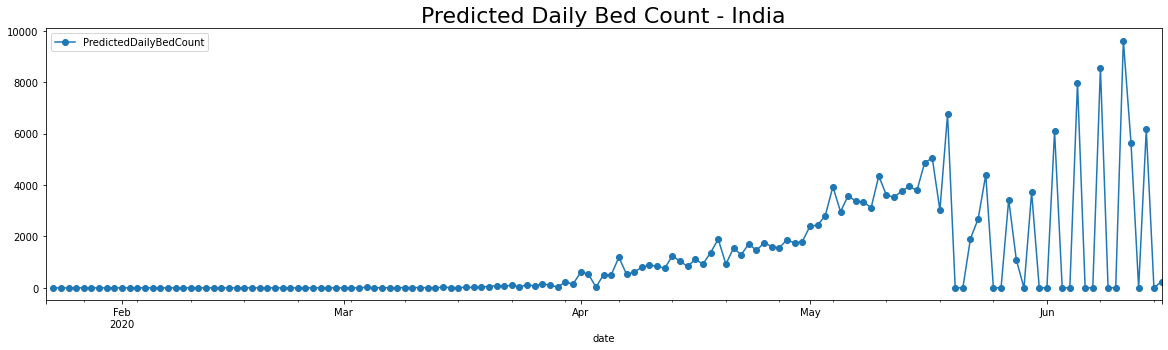

In [0]:
p_kalman['PredictedDailyBedCount'] = p_kalman['Predicted Cases'] - p_kalman['Predicted Cases'].shift(1)
p_kalman.tail(10)
p_kalman.iloc[:,1:3].plot(marker='o',figsize=(20,5)).set_title('Predicted Daily Bed Count - India'.format(prediction.iloc[0,0]),fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Predicted Cases - India')

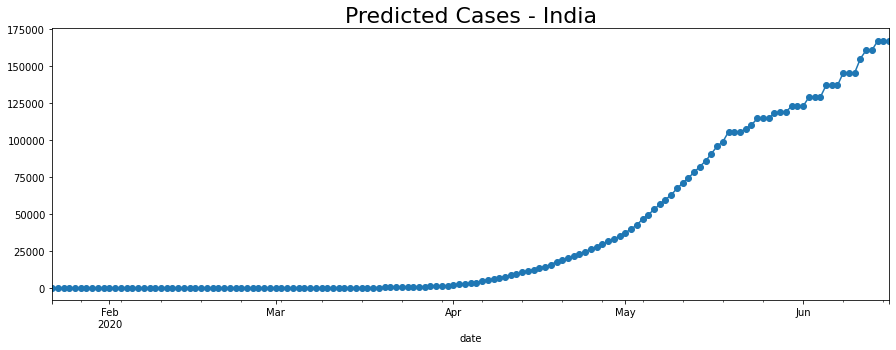

In [0]:
p_kalman.iloc[:,0].plot(marker='o',figsize=(15,5)).set_title('Predicted Cases - India'.format(prediction.iloc[0,0]),fontdict={'fontsize': 22})

In [0]:
p_kalman.tail(30)

,Predicted Cases,PredictedDailyBedCount
date,,
2020-05-18,98720.0,3022.0
2020-05-19,105468.0,6748.0
2020-05-20,105468.0,0.0
2020-05-21,105468.0,0.0
2020-05-22,107384.0,1916.0
2020-05-23,110062.0,2678.0
2020-05-24,114461.0,4399.0
2020-05-25,114461.0,0.0
2020-05-26,114461.0,0.0
